In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = np.load("../Data/LinearRegression/X_data.npy"), np.load("../Data/LinearRegression/Y_data.npy").reshape(-1,1)

In [3]:
X.shape, y.shape

((100, 3), (100, 1))

In [121]:
# import time
class LinearRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def predict(self, X):
        return X.dot(self.W)

    def get_gradient(self, X, y):
        gradient = []

        for i in range(X.shape[1]): # n+1
            gradient.append((2 * (y - self.predict(X)) * -X[:, i].reshape(-1,1)).sum()) # safe approach is always provide axis
        
        return np.array(gradient).reshape(-1,1)

    def r2_score(self, X, y):
        return 1 - (self.loss(self.predict(X), y)/self.loss(y, y.mean()))

    def loss(self, y_true, y_pred):
        return ((y_true - y_pred)**2).sum()
    
    def sum_of_residuals(self, X, y):
        return (y - self.predict(X)).sum()
    
    def batch_gradient_descent(self, X, y, n_epochs=500):
        X = np.copy(X)
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) #constant column added
        self.W = np.random.randn(X.shape[1], 1)
        losses = []
        for i in range(n_epochs):
            self.W = self.W - self.learning_rate*self.get_gradient(X, y)
            loss = self.loss(y, self.predict(X))
            print("\r"+f"epoch: {i+1}, loss: {loss}, acc: {self.r2_score(X, y)},SOR: {self.sum_of_residuals(X, y)}", end="")
            # time.sleep(0.1)
            losses.append(loss)
        
        return np.array(losses)

    def mini_batch_gradient_descent(self, X, y, n_epochs=500, batch_size=10):
        X = np.copy(X)
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) #constant column added
        self.W = np.random.randn(X.shape[1], 1)
        losses = []
        for i in range(n_epochs):
            random_indexes = np.random.choice(np.arange(0, X.shape[0]), size=batch_size)
            X_batch = X[random_indexes]

            self.W = self.W - self.learning_rate*self.get_gradient(X_batch, y[random_indexes])
            loss = self.loss(y, self.predict(X))
            print("\r"+f"epoch: {i+1}, loss: {loss}, acc: {self.r2_score(X, y)}, SOR: {self.sum_of_residuals(X, y)}", end="")
            # time.sleep(0.1)
            losses.append(loss)
        
        return np.array(losses)

    def fit(self, X, y, method="batch", **kwargs):

        if method == "batch":
            losses = self.batch_gradient_descent(X, y, **kwargs)
        
        elif method == "mini_batch":
            losses = self.mini_batch_gradient_descent(X, y, **kwargs)
        
        elif method == "stochastic":
            losses = self.mini_batch_gradient_descent(X, y, batch_size=1)


        return losses

epoch: 20, loss: 10266.560753575059, acc: 0.9914422134411031,SOR: -2.268414682760067e-06

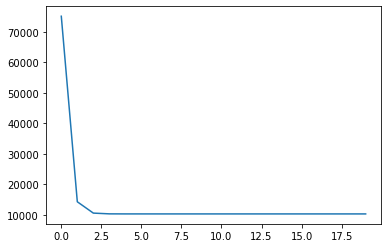

In [122]:
lr = LinearRegression(learning_rate=0.005)
losses = lr.fit(X, y, n_epochs=20)
plt.plot(losses)
plt.show()

epoch: 20, loss: 10702.503451478293, acc: 0.9910788293780158, SOR: 37.83540157673122

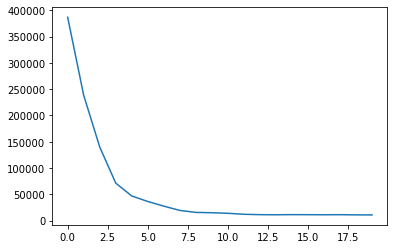

In [123]:
lr = LinearRegression(learning_rate=0.005)
losses = lr.fit(X, y, n_epochs=20, method="mini_batch", batch_size=30)
plt.plot(losses)
plt.show()

In [126]:
from loss_function import plot_loss

In [136]:
X_1d = np.linspace(-10, 10, 100).reshape(-1,1)
y_1d = 5 * X_1d + 10 + 5*np.random.randn(X_1d.shape[0], 1)

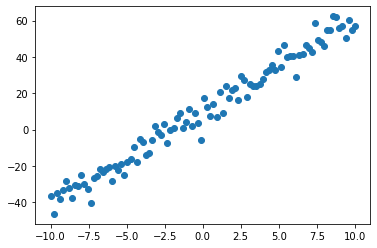

In [137]:
plt.scatter(X_1d, y_1d)
plt.show()

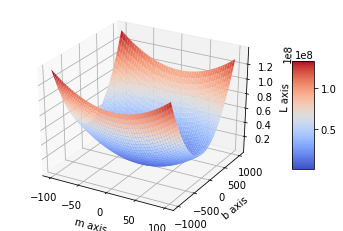

In [140]:
plot_loss(X_1d, y_1d)